# **Unveiling Film Tastes: A Personalized Movie Journey through Smart Recommendations.**







Group 2:

         Eric Lintari.
        Kamande Karigi.
        Lucy Waruguru.
        Victor Gachie.
        Cynthia Wanyeki.

Technical Mentor:  Diana Mong'ina.

Phase 4 Project: Recommendation System.

Deadline: 18th January 2024.

# **TABLE OF CONTENTS.**


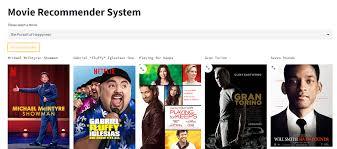

# **INTRODUCTION.**

The goal of this project is to delve into user behavior within the rise of movie streaming platforms and construct a model that enhances user engagement, ultimately leading to an enriched cinematic experience.

In today's digital age, online streaming has become the predominant avenue for accessing diverse cinematic content. The vastness of movie catalogs poses a challenge for users in selecting content tailored to their individual preferences. By comprehensively analyzing user behavior, we aim to build a recommendation system that simplifies the process of navigating through this cinematic maze, ensuring that users discover and enjoy movies that align closely with their tastes.

The significance of such a system lies in its potential to not only improve user satisfaction and retention but also to foster a dynamic and engaging movie-watching environment. Leveraging real-time project datasets sourced from platforms like [movielens](https://grouplens.org/datasets/movielens/latest/), our analysis will focus on a variety of user interactions, ratings, and viewing patterns to build a model that resonates with the diverse preferences of our audience. Through this project, we aspire to bring forth a personalized and enjoyable cinematic journey for each user.







# **BUSINESS UNDERSTANDING.**

The film industry boasts of a vast array of genres, ranging from action and drama to comedy, science fiction, horror, and beyond. Each genre caters to distinct tastes and moods, offering a rich tapestry of cinematic experiences. While this diversity is an advantage for movie enthusiasts, it also poses a challenge—the dilemma of choosing the perfect film from the extensive selection.

For users, navigating through this abundance of options can be a daunting task. The sheer volume of movies available makes decision-making overwhelming, especially when the goal is to ensure not just any watch but an enjoyable and satisfying cinematic experience. Consequently, businesses operating in this industry must delve into the complexities of user preferences to provide tailored recommendations and enhance the overall movie-watching experience.

# **PROBLEM STATEMENT.**

A streaming platform's success depends on how well it keeps users happy and interested. One big factor is the recommendation system – the feature that suggests movies for you to watch. This is crucial because there are so many movies on the platform, and everyone likes different things. It's like trying to find your way in a big, confusing maze.

People's taste in movies is very personal. What one person loves, another might not enjoy at all. So, predicting what movies a person will like is tricky. That's where our project comes in. We want to create a recommendation system that looks at what movies you've watched before, how you've rated them, and what other people who like similar things enjoyed. This way, we can suggest movies that match your taste, making it easier for you to discover and enjoy films that you'll probably love.







# **OBJECTIVES.**


1.	**Enhance User Experience:**
•	Increase user engagement by providing personalized movie recommendations.
•	Improve user satisfaction by suggesting movies aligned with individual tastes.


2.	**Increase User Retention:**
•	Retain users by offering a compelling and personalized movie-watching experience.
•	Encourage users to spend more time on the platform through relevant recommendations.


3.	**Drive Revenue:**
•	Increase the consumption of movies by recommending content that aligns with users' interests.
•	Potentially increase revenue through ad views or premium subscriptions.


# **SOURCE OF DATA.**


The data used was sourced from [MovieLens](https://grouplens.org/datasets/movielens/latest/). We used the small dataset due to limited computational power. We selected the four files in line with project objectives.


 **Movies.csv:** Contains information about the movies.


movieId - Unique identifier for each movie.

title - The movie titles.

genre - The various genres a movie falls into.

**Links.csv:**

•	Columns: movieId, imdbId, tmdbId

•	Insights:
•	movieId is likely the key that can be used to link this DataFrame with other DataFrames.
•	imdbId and tmdbId could be useful for external references to IMDb and TMDB.


**Ratings.csv:**

•	Columns: userId, movieId, rating, timestamp

•	Insights:
•	userId and movieId are crucial for identifying users and movies.

•	rating represents the user's rating for a movie.

•	timestamp indicates when the rating was given.


**Tags.csv:**

•	Columns: userId, movieId, tag, timestamp

•	Insights:
•	Similar structure to the Ratings DataFrame.

•	Additional information in the form of tags, providing more context about movies.

•	The tag column is of type object (likely string), which contains textual information.


# **IMPORTING LIBRARIES.**

In [17]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from scipy import stats
import seaborn as sns
!pip install scikit-surprise
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans
from surprise import SVD
from wordcloud import WordCloud

**Loading Datasets.**

In [18]:
#Loading and reading the datasets.

# List of CSV files along with corresponding column names
csv_files_and_columns = [
    ('movies.csv', ['movieId', 'title', 'genres']),
    ('links.csv', ['movieId', 'imdbId', 'tmdbId']),
    ('tags.csv', ['userId', 'movieId', 'tag', 'timestamp']),
    ('ratings.csv', ['userId', 'movieId', 'rating', 'timestamp'])
]

# Dictionary to store DataFrames
dataframes = {}

# Loop through each CSV file and its corresponding columns
for csv_file, columns in csv_files_and_columns:
    # Extract the DataFrame name from the file name (remove extension)
    df_name = csv_file.split('.')[0]

    # Read the CSV file into a DataFrame with specified column names
    dataframes[df_name] = pd.read_csv(csv_file, delimiter=',', header=0, names=columns, skipinitialspace=True)

# Access the DataFrames using keys
movies_df = dataframes['movies']
links_df = dataframes['links']
tags_df = dataframes['tags']
ratings_df = dataframes['ratings']

# Print the head of each DataFrame
for df_name, df in dataframes.items():
    print(f"\n{df_name}_df:")
    print(df.head())



movies_df:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

links_df:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

tags_df:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2   

All Datasets have a common column, movieID. This will be used in the merging of the datasets.

# **Data Understanding.**

In [19]:
# Display information for each dataset
print("Movies DataFrame:")
print("Shape:", movies_df.shape)
print(movies_df.info())
print("\n")

print("Ratings DataFrame:")
print("Shape:", ratings_df.shape)
print(ratings_df.info())
print("\n")

print("Tags DataFrame:")
print("Shape:", tags_df.shape)
print(tags_df.info())
print("\n")

print("Links DataFrame:")
print("Shape:", links_df.shape)
print(links_df.info())

Movies DataFrame:
Shape: (9742, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


Ratings DataFrame:
Shape: (100836, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


Tags DataFrame:
Shape: (3683, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null 

**Movies Dataframe:**

Rows-9742

Columns-3


**Ratings Dataframe:**

Rows-100,836

Columns-4


**Links Dataframe:**

Rows-9742

Columns-3


**Tags Dataframe:**

Rows-3683

Columns-4

Check for Datatypes of each column.

In [20]:
# Function to count numerical and categorical variables
def count_variable_types(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    return len(numerical_cols), len(categorical_cols)

# Display counts for each dataset
movies_numerical, movies_categorical = count_variable_types(movies_df)
links_numerical, links_categorical = count_variable_types(links_df)
ratings_numerical, ratings_categorical = count_variable_types(ratings_df)
tags_numerical, tags_categorical = count_variable_types(tags_df)

# Print results
print(f"Movies Dataset - Numerical Variables: {movies_numerical}, Categorical Variables: {movies_categorical}")
print(f"Links Dataset - Numerical Variables: {links_numerical}, Categorical Variables: {links_categorical}")
print(f"Ratings Dataset - Numerical Variables: {ratings_numerical}, Categorical Variables: {ratings_categorical}")
print(f"Tags Dataset - Numerical Variables: {tags_numerical}, Categorical Variables: {tags_categorical}")


Movies Dataset - Numerical Variables: 1, Categorical Variables: 2
Links Dataset - Numerical Variables: 3, Categorical Variables: 0
Ratings Dataset - Numerical Variables: 4, Categorical Variables: 0
Tags Dataset - Numerical Variables: 3, Categorical Variables: 1


**Movies Dataset:**

Numerical Variables: 1 (movieId)

Categorical Variables: 2 (title and genres)


**Links Dataset:**

Numerical Variables: 3 (movieId, imdbId, tmdbId)

Categorical Variables: 0



**Ratings Dataset:**

Numerical Variables: 4 (userId, movieId, rating, timestamp)

Categorical Variables: 0


**Tags Dataset:**

Numerical Variables: 3 (userId, movieId, timestamp)

Categorical Variables: 1 (tag)

Merging Datsets.

In [21]:
# Merge movies_df with links_df
merged_df = pd.merge(movies_df, links_df, on='movieId', how='left') #to combine general movie information with additional details.

# Merge the result with tags_df
merged_df = pd.merge(merged_df, tags_df, on='movieId', how='left')  #to incorporate tags.

# Merge the final result with ratings_df
final_merged_df = pd.merge(merged_df, ratings_df, on='movieId', how='left')  #to include user ratings.

# Create a new DataFrame by copying the final merged DataFrame
new_df = final_merged_df.copy()

# Display information, data types, and the first few rows of the new DataFrame
print("Info for new DataFrame:")
print(new_df.info())

# Display data types of each column
print("\nData Types of Columns:")
print(new_df.dtypes)

# Display the first few rows of the new DataFrame
print("\nFirst few rows of new DataFrame:")
print(new_df.head())



Info for new DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   imdbId       285783 non-null  int64  
 4   tmdbId       285770 non-null  float64
 5   userId_x     233234 non-null  float64
 6   tag          233234 non-null  object 
 7   timestamp_x  233234 non-null  float64
 8   userId_y     285762 non-null  float64
 9   rating       285762 non-null  float64
 10  timestamp_y  285762 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 26.2+ MB
None

Data Types of Columns:
movieId          int64
title           object
genres          object
imdbId           int64
tmdbId         float64
userId_x       float64
tag             object
timestamp_x    float64
userId_y       float64
rating 

The merged dataframe has:

Rows-285,783.

Columns-11.

Numerical Variables-8. (movieID, imdbID, tmdbID, UserID_X, timestamp_x, UserID_y, timestamp_y, rating.)

Categorical Variables-3. (title, genre, tag.)

Renaming the Columns with similar names to avoid confusion.

In [22]:
# Rename the first set of columns from tags dataframe.
new_df = new_df.rename(columns={'userId_x': 'tags_userId', 'timestamp_x': 'tags_timestamp'})

# Rename the second set of columns from ratings dataframe.
new_df = new_df.rename(columns={'userId_y': 'ratings_userId', 'timestamp_y': 'ratings_timestamp'})
new_df.rename


<bound method DataFrame.rename of         movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
285778   193581  Black Butler: Book of the Atlantic (2017)   
285779   193583               No Game No Life: Zero (2017)   
285780   193585                               Flint (2017)   
285781   193587        Bungo Stray Dogs: Dead Apple (2018)   
285782   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres   imdbId    tmdbId  \
0       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
1       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   

In [25]:
# info of the new dataframe.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movieId            285783 non-null  int64  
 1   title              285783 non-null  object 
 2   genres             285783 non-null  object 
 3   imdbId             285783 non-null  int64  
 4   tmdbId             285770 non-null  float64
 5   tags_userId        233234 non-null  float64
 6   tag                233234 non-null  object 
 7   tags_timestamp     233234 non-null  float64
 8   ratings_userId     285762 non-null  float64
 9   rating             285762 non-null  float64
 10  ratings_timestamp  285762 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 26.2+ MB


In [26]:
# summary statistics for the new dataframe.
new_df.describe()

,movieId,imdbId,tmdbId,tags_userId,tags_timestamp,ratings_userId,rating,ratings_timestamp
count,285783.000000,2.857830e+05,285770.000000,233234.000000,2.332340e+05,285762.000000,285762.000000,2.857620e+05
mean,14927.663741,2.956050e+05,12797.315320,470.681354,1.384754e+09,313.894279,3.841270,1.214707e+09
std,31402.673519,5.150156e+05,43479.255523,153.324249,1.534705e+08,179.451387,1.020798,2.233730e+08
min,1.000000,4.170000e+02,2.000000,2.000000,1.137179e+09,1.000000,0.500000,8.281246e+08
25%,296.000000,1.098300e+05,489.000000,424.000000,1.242494e+09,160.000000,3.000000,1.019133e+09
50%,1721.000000,1.125730e+05,680.000000,477.000000,1.457901e+09,314.000000,4.000000,1.211377e+09
75%,5673.000000,2.415270e+05,8963.000000,599.000000,1.498457e+09,465.000000,4.500000,1.445346e+09
max,193609.000000,8.391976e+06,525662.000000,610.000000,1.537099e+09,610.000000,5.000000,1.537799e+09


The dataset seems to cover a diverse range of movies, users, and timestamps.

Ratings exhibit a moderate spread, with a mean around 3.84, indicating that, on average, movies are rated relatively positively.

The temporal distribution of tags and ratings spans a significant period, as indicated by the timestamp statistics.

# **DATA CLEANING.**

Check missing values, outliers, duplicates, inconsistencies, memory optimization, and correct data types.

In [27]:
# Check for missing values
missing_values = new_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers (assuming numeric columns)
numeric_columns = new_df.select_dtypes(include=[np.number]).columns
outliers = new_df[numeric_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std())
print("\nOutliers:\n", outliers.sum())

# Check for duplicates
duplicates = new_df.duplicated().sum()
print("\nDuplicates:", duplicates)

# Check for inconsistencies or errors (in genres)
# Assuming genres column has pipe-separated values
inconsistent_genres = new_df['genres'].apply(lambda x: '|' in x)
print("\nInconsistent Genres:", inconsistent_genres.sum())

# Optimize memory usage
new_df_optimized = new_df.copy()
for col in new_df_optimized.columns:
    if new_df_optimized[col].dtype == 'object':
        new_df_optimized[col] = new_df_optimized[col].astype('category')

# Display information after optimization
print("\nOptimized DataFrame:")
print("Shape:", new_df_optimized.shape)
print(new_df_optimized.info())

# Ensure correct data types for each column
# Convert timestamp columns to datetime
timestamp_columns = ['tags_timestamp', 'ratings_timestamp']
new_df_optimized[timestamp_columns] = new_df_optimized[timestamp_columns].apply(pd.to_datetime, unit='s')

# Display information after ensuring correct data types
print("\nDataFrame with Correct Data Types:")
print(new_df_optimized.info())


Missing Values:
 movieId                  0
title                    0
genres                   0
imdbId                   0
tmdbId                  13
tags_userId          52549
tag                  52549
tags_timestamp       52549
ratings_userId          21
rating                  21
ratings_timestamp       21
dtype: int64

Outliers:
 movieId              7998
imdbId               6811
tmdbId               7420
tags_userId           386
tags_timestamp          0
ratings_userId          0
rating               2896
ratings_timestamp       0
dtype: int64

Duplicates: 0

Inconsistent Genres: 261486

Optimized DataFrame:
Shape: (285783, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   movieId            285783 non-null  int64   
 1   title              285783 non-null  category
 2   genres             285783 non-null  ca